In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData 

In [92]:
def get_mass_cors():
    A = np.array([114, 116, 118, 122, 124])
    A_prime = 120
    mass_cors = []
    # A_new = np.array([111904824.9, 113902780.13, 115901742.82, 117901606.6, 
    #                           121903444.0, 123905276.7]) * 1E-6 # u, Wang 2017
    A_new = np.array([113902780.13, 115901742.82, 117901606.6, 
                              121903444.0, 123905276.7]) * 1E-6 # u, Wang 2017
    A_prime_new = 119902201.9 * 1E-6 # u, Wang 2017

    for i in range(len(A_new)):
        mass_cor = (A_new[i] * A_prime_new) / (A_new[i] - A_prime_new)
        mass_cors.append(mass_cor)  
        print(A_new[i]) 
    print(mass_cors)

    return mass_cors

In [93]:
mass_cors = get_mass_cors()

113.90278013
115.90174281999998
117.9016066
121.903444
123.9052767
[np.float64(-2276.4184055888727), np.float64(-3473.819851736983), np.float64(-7066.22785672223), np.float64(7303.709708482223), np.float64(3711.2760179646752)]


In [94]:
# IS from data analysis of evens 
# isotope_shifts = np.array([-199.71, -104.78, -69.77, -37.48, 34.27, 63.68])*1E-3 * mass_cors # GHz with 112
# is_err = np.array([6.05513204, 4.93604236, 5.69966217, 4.18479242, 3.53165067, 6.23141983])*1E-3 * np.abs(mass_cors) # GHz

isotope_shifts = np.array([-104.78, -69.77, -37.48, 34.27, 63.68])*1E-3 * mass_cors # GHz without 112
is_err = np.array([4.93604236, 5.69966217, 4.18479242, 3.53165067, 6.23141983])*1E-3 * np.abs(mass_cors) # GHz

In [95]:
# r^2 
# r2 = np.array([-0.520, -0.3838, -0.2471, -0.1174, 0.1055, 0.2008]) * mass_cors # fm^2 Angeli & Marinova 
# r2_err = np.array([0.005, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]) * np.abs(mass_cors)

r2 = np.array([-0.3838, -0.2471, -0.1174, 0.1055, 0.2008]) * mass_cors # fm^2 Angeli & Marinova 
r2_err = np.array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001]) * np.abs(mass_cors)

## calc vals 
r2_calc = np.array([-0.3889956, -0.24954861, -0.11706912, 0.10712595, 0.20142864]) * mass_cors # fm^2
r2_err_calc = np.array([0.026865433, 0.026279522, 0.026315894, 0.028333026, 0.029049974]) * np.abs(mass_cors) # fm^2

In [96]:
# Gustafsson GHz 
is_1S0_1P1 = np.array([
    # -971,  # 112 5,22 # err stat,sys
    -722,  # 114 5,16
    # -637,  # 115 5,19
    -458,  # 116 2,12
    # -372,  # 117 3,18
    -222,  # 118 2,12
    # -142,  # 119, 2,7
    # 0,     # 120
    192,   # 122 3,8
    342    # 124 3,17
])*1E-3 * mass_cors
stat_err_1S0_1P1 = [5, 2, 2, 3, 3]
sys_err_1S0_1P1 = [16, 12, 12, 8, 17]
total_err_1S0_1P1 = np.array([np.sqrt(s**2 + e**2) for s, e in zip(stat_err_1S0_1P1, sys_err_1S0_1P1)])*1E-3  * np.abs(mass_cors)
f_1S0 = 1.584 # GHz 209 err
m_1S0 = 160 # GHz 184 err 

is_3P2_3P2 = np.array([
    # -1253,  # 112 6, 29
    -911,   # 114 8, 23
    # -828,   # 115 15, 19
    -580,   # 116 6, 16
    # -463,   # 117 5,13
    -267,   # 118 4, 10
    # -175,   # 119 6,8
    # 0,      # 120 
    228,    # 122 11,10
    462     # 124 10,15
])* 1E-3 * mass_cors
stat_err_3P2_3P2 = [8, 6, 4, 11, 10]
sys_err_3P2_3P2 = [23, 16, 10, 10, 15]
total_err_3P2_3P2 = np.array([np.sqrt(s**2 + e**2) for s, e in zip(stat_err_3P2_3P2, sys_err_3P2_3P2)])* 1E-3 * np.abs(mass_cors)
f_3P2 = 2.024 # GHz
m_3P2 = 205 # GHz

# is_3P0_3P1 = np.array([
#     -603, # 116
#     -263, # 118
#     270, # 122
#     449 # 124
# ])*1E-3 * mass_cors



In [97]:
def linear_func(B, x):
    return B[0] * x + B[1]

In [98]:
def get_fit(x, y, x_err, y_err):
    model = Model(linear_func)
    data = RealData(x, y, sx=x_err, sy=y_err)
    odr = ODR(data, model, beta0=[0.1, 200])  # initial guess for [slope, intercept] for is, r^2 0.3, 63

    output = odr.run()
    slope, intercept = output.beta
    slope_err, intercept_err = output.sd_beta

    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = slope * x_fit + intercept

    return x_fit, y_fit, slope, slope_err, intercept, intercept_err

In [122]:
def king_plot(x, y, x_err, y_err, title):
    x_fit, y_fit, slope, slope_err, intercept, intercept_err = get_fit(x,y,x_err,y_err)

    plt.errorbar(x, y, xerr=x_err, yerr=y_err,
                fmt='o', color='black', ecolor='gray', capsize=3)
    plt.plot(x_fit, y_fit, 'r--', label=f'y = {slope:.3f}x + {intercept:.3f}')
    # plt.xlabel(r'$\delta\langle r^2 \rangle$ (fm$^2$ amu)')
    # plt.xlabel('Gustafsson 1S0 --> 1P1 (GHz amu)')
    plt.ylabel(r'$\delta\nu^{A,120}_{Sn^{-}}\;\; \mu^{-1}$ (GHz amu)')
    # plt.xlabel(r'$\delta\nu^{A,120}_{^3P_2 \rightarrow ^3P_2}\;\; \mu^{-1}$ (GHz amu)')
    # plt.title(title)
    # plt.xlim(-0.00025, 0.0001)
    plt.legend()
    # plt.savefig(f"kingplot_3p23p2.pdf", format="pdf", dpi=300, bbox_inches="tight")
    plt.show()

    # plt.errorbar(is_3P2_3P2, isotope_shifts, xerr=total_err_3P2_3P2, yerr=is_err,
    #             fmt='o', color='black', ecolor='gray', capsize=3)
    # plt.plot(x_fit_2, y_fit_2, 'r--', label=f'y = {slope_2:.3f}x + {intercept_2:.3f}')
    # plt.xlabel('Gustafsson 3P2 --> 3P1 (GHz amu)')
    # plt.ylabel(r'$\delta\nu$ (GHz amu)')
    # plt.legend()

    # print(slope, intercept)
    if title == '1S0-1P1':
        f_is = slope * f_1S0 # GHz 
        m_is = intercept + slope * m_1S0 # GHz 
        print(f_is, m_is)
    elif title == '3P2-3P2':
        f_is = slope * f_3P2 # GHz
        m_is = intercept + slope * m_3P2 # GHz
        print(f_is, m_is)

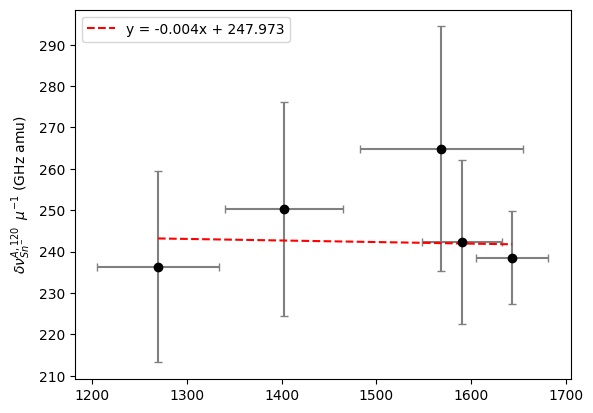

-0.005977757408423996 247.369608028844


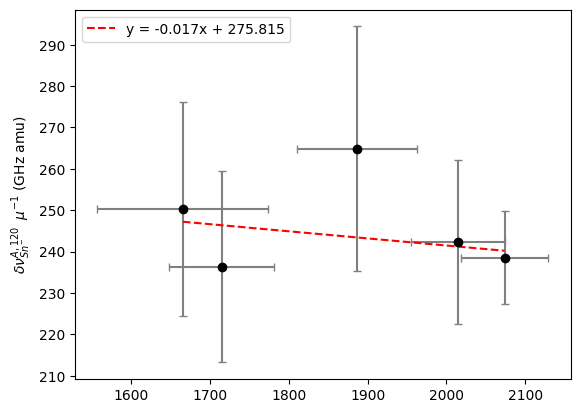

-0.03475296339953003 272.29554681901345


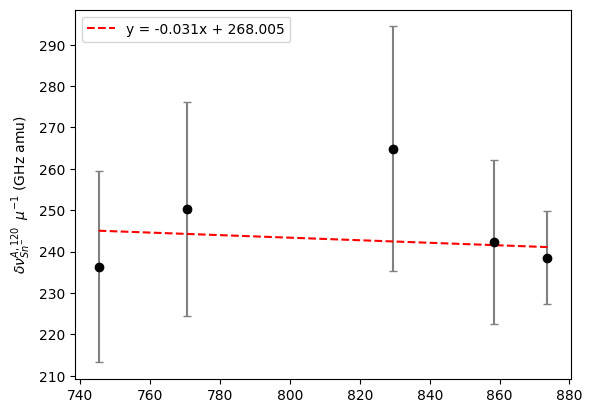

In [123]:
king_plot(is_1S0_1P1, isotope_shifts, total_err_1S0_1P1, is_err, title='1S0-1P1')
king_plot(is_3P2_3P2, isotope_shifts, total_err_3P2_3P2, is_err, title='3P2-3P2')
king_plot(r2, isotope_shifts, r2_err, is_err, title='r2')